<a href="https://colab.research.google.com/github/neel26desai/deep_learing_with_low_code_libraries/blob/main/huggingface_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install transformers
!pip install torch
!pip install accelerate

In [12]:
from transformers import pipeline
import textwrap

# Text Classification

In [14]:
txt = """Lionel Messi has conquered his final peak. \
         Lionel Messi has shaken hands with paradise, The little boy from Rosario, Santa Fe, \
         has just pitched up in heaven. He climbs into a galaxy of his own. He has his crowning moment and of course he is not alone, He was beautiful. \
         He was the point of difference. He has always been the point of difference. \
         Unparalleled, and maybe today there will, of course, always be those who argue, always be those who debate. \
         And the debate could rage on if you like.\
         But as he falls in love with the object in the world that his heart most desired, \
         it is hard to escape the supposition that he has rendered himself today, the greatest of all time.\
         Messi Wins the 2022 world cup for Argentina.
         """

In [15]:
#building a text wrapper with to display the text

wrapper = textwrap.TextWrapper(width=80, break_long_words=False, break_on_hyphens=False)
print(wrapper.fill(txt))

Lionel Messi has conquered his final peak.          Lionel Messi has shaken
hands with paradise, The little boy from Rosario, Santa Fe,          has just
pitched up in heaven. He climbs into a galaxy of his own. He has his crowning
moment and of course he is not alone, He was beautiful.          He was the
point of difference. He has always been the point of difference.
Unparalleled, and maybe today there will, of course, always be those who argue,
always be those who debate.          And the debate could rage on if you like.
But as he falls in love with the object in the world that his heart most
desired,          it is hard to escape the supposition that he has rendered
himself today, the greatest of all time.         Messi Wins the 2022 world cup
for Argentina.


In [7]:

#using the default text-classification model
sentiment_pipeline = pipeline('text-classification')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [33]:
sentiment=sentiment_pipeline(txt)
print(sentiment)

[{'label': 'NEUTRAL', 'score': 0.9403356313705444}]


In [34]:
#using a non deafult model in pipelline
neg_text = "I wasn't very happy with the service which I received on Airlines Alpha when I took their flight from San Francisco to mummbai"

#specifying a particular model to be used
sentiment_pipeline = pipeline('text-classification',model='FacebookAI/roberta-large-mnli')
sentiment = sentiment_pipeline(neg_text)
print(sentiment)

Some weights of the model checkpoint at FacebookAI/roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'label': 'NEUTRAL', 'score': 0.764299213886261}]


# Named Entity Recognition

In [11]:
#using the default bert model for named entity recognization
ner_pipeline = pipeline('ner')

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

In [28]:
# using simple aggregation strategy
entities = ner_pipeline(txt, aggregation_strategy="simple")
print('Entities When using Simple aggregation strategy')
for entity in entities:
    print(f"{entity['word']}: {entity['entity_group']} ({entity['score']})")

Entities When using Simple aggregation strategy
Lionel Messi: PER (0.9989679455757141)
Lionel Messi: PER (0.9987383484840393)
Rosario: LOC (0.9993360638618469)
Santa Fe: LOC (0.999098539352417)
Messi: PER (0.9980669021606445)
Argentina: LOC (0.999663233757019)


In [29]:
# using average aggregation strategy, for each entity the confidence is average of all ocuurenes
entities = ner_pipeline(txt,aggregation_strategy="average")
#printinting the en
print('Entities average aggregation strategy')
for entity in entities:
    print(f"{entity['word']}: {entity['entity_group']} ({entity['score']})")

Entities average aggregation strategy
Lionel Messi: PER (0.9989593029022217)
Lionel Messi: PER (0.9987344741821289)
Rosario: LOC (0.9993360638618469)
Santa Fe: LOC (0.999098539352417)
Messi: PER (0.9980669021606445)
Argentina: LOC (0.999663233757019)


# Question Answering

In [17]:
#building a question answering pipeline
qa_pipeline = pipeline("question-answering")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [22]:
question = "Who is the little boy from Rozario"

answer = qa_pipeline(question=question, context=txt)
answer

{'score': 0.3182617127895355, 'start': 0, 'end': 12, 'answer': 'Lionel Messi'}

In [23]:
question = "What has Messi done"

outputs = qa_pipeline(question=question, context=txt)
answer

{'score': 0.279843270778656,
 'start': 747,
 'end': 790,
 'answer': 'Messi Wins the 2022 world cup for Argentina'}

# Text Summarization

In [24]:
summarization_pipeline = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [27]:
#max_length 50 will make sure that summary at max is 50 words
summary = summarization_pipeline(txt, max_length=50, clean_up_tokenization_spaces=True)
print(wrapper.fill(summary[0]['summary_text']))

Your min_length=56 must be inferior than your max_length=50.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1202: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (50). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


 Lionel Messi has conquered his final peak. Messi has always been the point of
difference. He was the star of his own. He has won the World Cup for Argentina
in 2022. Messi is now the world's most expensive player in the


The summary ended abruptly lets look at ways we can fix it

In [26]:
#setting min length to 50 , so that summaary is atleast 50 words longs, this will prevent the model from abruptly ending a sentence
summary = summarization_pipeline(txt, min_length=50, clean_up_tokenization_spaces=True)
print(wrapper.fill(summary[0]['summary_text']))

 Lionel Messi has conquered his final peak. Messi has always been the point of
difference. He was the star of his own. He has won the World Cup for Argentina
in 2022. Messi is now the world's most expensive player in the history of
football.


# Translation

In [50]:
#english to french, we dont have default piepline to en to es so we need to specify a model for it
en_to_fr = pipeline('translation_en_to_fr',model='Helsinki-NLP/opus-mt-en-fr',max_length=400)
french_translation  =  en_to_fr(txt)
french_text = french_translation[0]['translation_text']
french_text

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


"Lionel Messi a conquis son dernier sommet. Lionel Messi a secoué les mains avec le paradis, Le petit garçon de Rosario, Santa Fe, vient de monter au ciel. Il monte dans une galaxie à lui. Il a son moment de couronnement et bien sûr il n'est pas seul, Il était beau. Il était le point de différence. Il a toujours été le point de différence. Il a toujours été le point de différence. Sans parallèle, et peut-être aujourd'hui, il sera toujours ceux qui argumentent, toujours ceux qui débattent. Et le débat pourrait faire rage si vous le souhaitez. Mais comme il tombe amoureux de l'objet dans le monde que son cœur le plus désiré, il est difficile d'échapper à la supposition qu'il s'est rendue aujourd'hui, le plus grand de tous les temps. Messi gagne la coupe du monde de 2022 pour l'Argentine."

In [51]:
#french to ennglish translation
fr_to_en = pipeline('translation_fr_to_en',model='Helsinki-NLP/opus-mt-fr-en',max_length=400)
english_translation = fr_to_en(french_text)
english_text = english_translation[0]['translation_text']
english_text

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

'Lionel Messi has conquered his last summit. Lionel Messi shook his hands with paradise, The little boy of Rosario, Santa Fe, has just ascended to heaven. He ascends into a galaxy to himself. He has his crowning moment and of course he is not alone, He was beautiful. He was the point of difference. He was always the point of difference. He has always been the point of difference. Without parallel, and perhaps today, he will always be those who argue, always those who argue. And the debate could rage if you wish. But as he falls in love with the object in the world that his most desired heart, it is difficult to escape the assumption that he has come today, the greatest of all times. Messi wins the world cup of 2022 for Argentina.'

In [52]:
#garbage collection
fr_to_en,en_to_fr, qa_pipeline, summarization_pipeline, ner_pipeline, sentiment_pipeline

(<transformers.pipelines.text2text_generation.TranslationPipeline at 0x790336bffc70>,
 <transformers.pipelines.text_classification.TextClassificationPipeline at 0x79032c6991b0>)

In [57]:
import gc
gc.collect()

0

# One shot classification

In [58]:
classes = ['Sports','Movies','Achievement']
zero_shot_classifier = pipeline("zero-shot-classification",
                                model="vicgalle/xlm-roberta-large-xnli-anli")

config.json:   0%|          | 0.00/734 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [60]:
zero_shot_classifier(txt, classes, multi_label=True)

{'sequence': 'Lionel Messi has conquered his final peak.          Lionel Messi has shaken hands with paradise, The little boy from Rosario, Santa Fe,          has just pitched up in heaven. He climbs into a galaxy of his own. He has his crowning moment and of course he is not alone, He was beautiful.          He was the point of difference. He has always been the point of difference.          Unparalleled, and maybe today there will, of course, always be those who argue, always be those who debate.          And the debate could rage on if you like.         But as he falls in love with the object in the world that his heart most desired,          it is hard to escape the supposition that he has rendered himself today, the greatest of all time.         Messi Wins the 2022 world cup for Argentina.\n         ',
 'labels': ['Achievement', 'Sports', 'Movies'],
 'scores': [0.9948529601097107, 0.98157799243927, 0.004586157854646444]}

We can see that Achievement and sports have higher score in the passage, and movie has a really low score.

#Computer Vision

In [66]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.3 MB/s eta 0:00:00


In [2]:
#using the dert model for object detection
from transformers import DetrFeatureExtractor, DetrForObjectDetection
from PIL import Image
from IPython.display import display


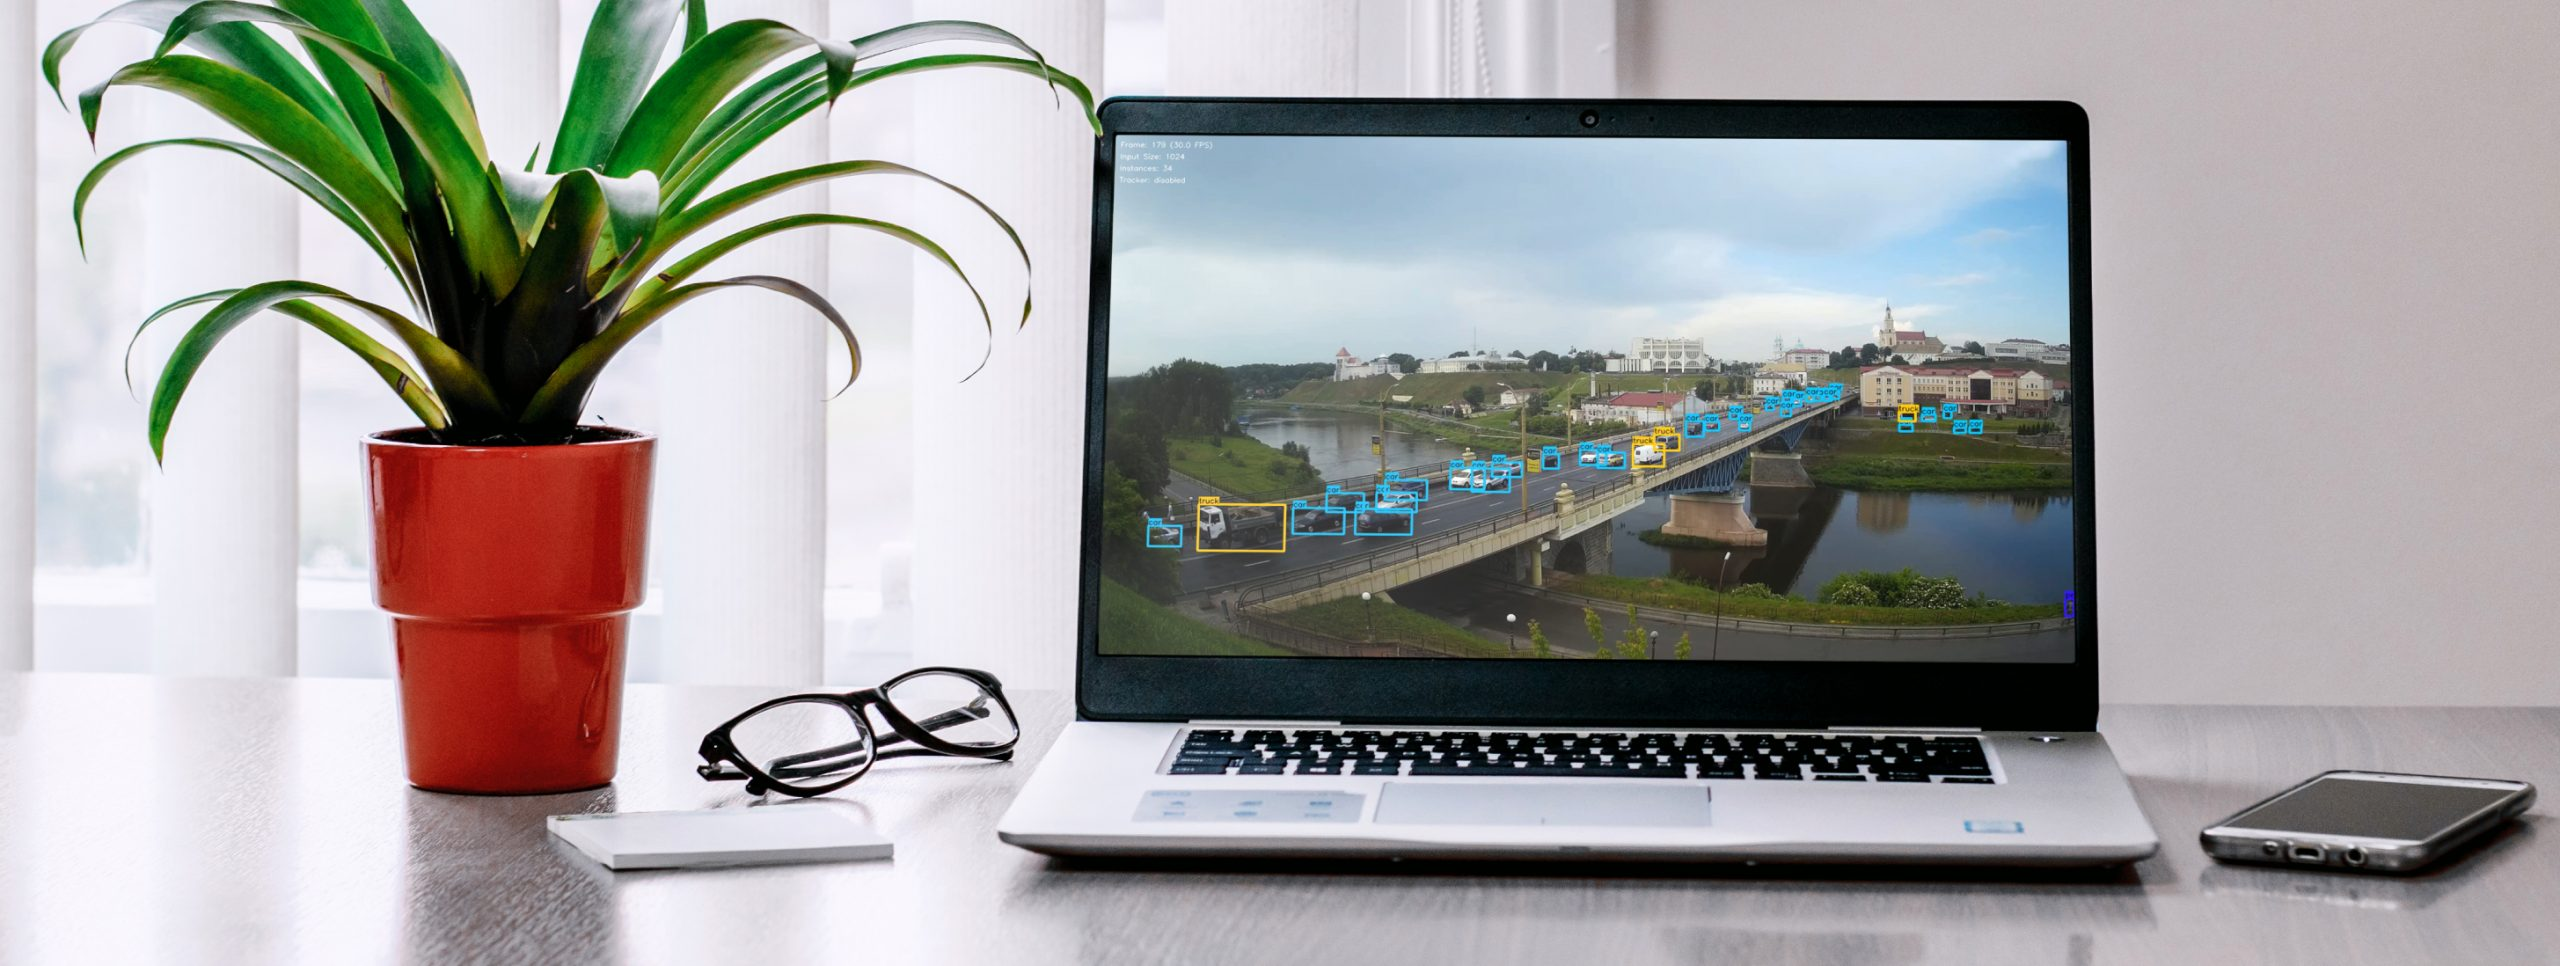

In [3]:
filepath='/content/object_detection_image1.jpeg'
#loading and viewing the image
image = Image.open(filepath)
display(image)

In [4]:
#we'll need a feature extractor whoses values we'll feed to the model.
# we are using facebook/detr-resnet-101-dc5 model
feature_extractor = DetrFeatureExtractor.from_pretrained('facebook/detr-resnet-101-dc5')
model = DetrForObjectDetection.from_pretrained('facebook/detr-resnet-101-dc5')

/usr/local/lib/python3.10/dist-packages/transformers/models/detr/feature_extraction_detr.py:38: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


model.safetensors:   0%|          | 0.00/179M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-101-dc5 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
#extracting features from the image
inputs = feature_extractor(images=image, return_tensors="pt")
# passing the extracted inputs to the model to get the predictions and bounding boxes
outputs = model(**inputs)

In [6]:
logits = outputs.logits
bboxes = outputs.pred_boxes

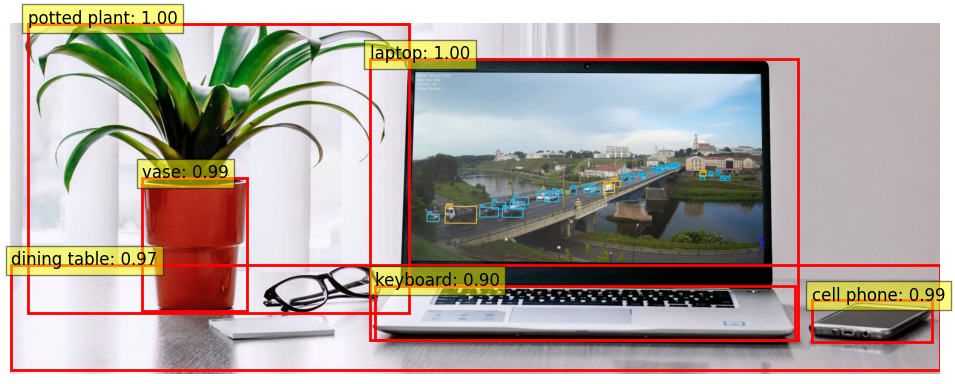

In [21]:
#code generated through ChatGPT
import matplotlib.pyplot as plt

# Convert logits to probabilities and get the most likely class for each detected object
probabilities = logits.softmax(-1)[0, :, :-1].detach()
scores, labels = probabilities.max(-1)

# Filter out low-confidence detections
threshold = 0.9  # You can adjust this threshold
keep = scores > threshold

# Get the labels from the model's config
id2label = model.config.id2label

# Get the size of the image
width, height = image.size

# Draw the bounding boxes and labels on the image
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

# Keep track of the positions where labels have been placed
label_positions = []

for score, label, box in zip(scores[keep], labels[keep], bboxes[0][keep].detach()):
    x, y, w, h = box
    # Scale the coordinates to the image size
    x0, x1, y0, y1 = x*width - w*width/2, x*width + w*width/2, y*height - h*height/2, y*height + h*height/2
    rect = plt.Rectangle((x0, y0), w*width, h*height, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    # Adjust the label position if it overlaps with an existing label
    label_text = f'{id2label[label.item()]}: {score.item():.2f}'
    label_position = (x0, y0)
    while any(np.linalg.norm(np.array(label_position) - np.array(pos)) < 10 for pos in label_positions):
        label_position = (label_position[0], label_position[1] - 10)
    label_positions.append(label_position)

    ax.text(*label_position, label_text, fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))

plt.axis('off')
plt.show()


# Audio

In [2]:
!pip install noisereduce

In [3]:
from transformers import Wav2Vec2Tokenizer, Wav2Vec2ForCTC,Wav2Vec2Processor
import soundfile as sf
import torch
import librosa
import noisereduce as nr

In [4]:
# Load the processor and model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You sho

In [5]:
# Load the audio file
audio_input, sr = librosa.load("/content/the-little-boy-from-rosario,argentina-made-with-Voicemod.mp3", sr=16000)
# Reduce noise
audio_input_denoised = nr.reduce_noise(y=audio_input, sr=sr)

In [7]:
# Process the audio input
inputs_to_model = processor(audio_input_denoised, return_tensors="pt", padding="longest",sampling_rate=sr).input_values

In [8]:
logits = model(inputs_to_model).logits

In [9]:
# Decode the predicted text
predicted_ids = torch.argmax(logits, dim=-1)
transcription = processor.batch_decode(predicted_ids)

In [17]:
transcription

["THE LITTLE BOY F THE GRAZARIO ARCHENTIN ON THE HALF OF THA VERY LITTLE BOY WEARING HIS SHOW MESSY WAT A MILLION MAX MESSY FOR A MILLION FLASH HOLTS NO ONE KICKOF THE BALL ONE TEGIN OF THE FOOTBALL HE'S DONEIT BEFORE WHOES GOT IT MANY TIMES BEFORE IN THE NEW COUNT AROUND SPAN AROUND THE OR HE'S DOT IT BRILLIANTLY FOR HIS NATUN IN HIS COMPETITION HE MUST DO IT NOW MESSY MUST  S HE NEL MESSY NOT NO NOT O GO NO ITS ON AWAY HEAT N AWAY  O N"]

#Table QA

In [19]:
from transformers import TapasTokenizer, TapasForQuestionAnswering
import pandas as pd

In [27]:
#the Tapas tokenizer only accepts strings
data = {
    "Name": ["Neel", "John", "Eden"],
    "Food Share": ['10', '20', '30'],
    "Drink Share": ['4', '8', '0']
}

In [28]:
df = pd.DataFrame.from_dict(data)

In [29]:
# Load the tokenizer and model
tokenizer = TapasTokenizer.from_pretrained("google/tapas-large-finetuned-wtq")
model = TapasForQuestionAnswering.from_pretrained("google/tapas-large-finetuned-wtq")

In [30]:
question = "What was Neel's food share"


In [31]:
# Tokenize the input
inputs = tokenizer(table=df, queries=question, padding="max_length", return_tensors="pt")

# Get the model's output
outputs = model(**inputs)

In [ ]:
# Convert logits to probabilities
# Detach logits from the computation graph
logits = outputs.logits.detach()
probs = logits.softmax(dim=-1).detach()

# Get the predicted answer
predicted_answer_coordinates = tokenizer.convert_logits_to_predictions(inputs, logits)[0]

In [37]:
predicted_answer_coordinates

[[(0, 1)]]

we get the cell number which has the answer

In [38]:
df.iloc[0,1]

'10'

That is the correct answer

References:
1. https://colab.research.google.com/github/huggingface/education-toolkit/blob/main/03_getting-started-with-transformers.ipynb#scrollTo=PTC-NycTByIP
2. https://huggingface.co/docs/transformers/en/main_classes/pipelines
3. https://huggingface.co/facebook/detr-resnet-101-dc5
4. https://huggingface.co/facebook/wav2vec2-base-960h